# Supervised Learning

Supervised learning is a type of machine learning where the algorithm learns from labeled training data, which includes both the input features and the corresponding output labels. The goal of supervised learning is to learn a mapping from input variables to output variables so that the algorithm can make predictions or decisions when new input data is given.

In supervised learning, the algorithm is provided with a dataset that consists of input-output pairs, and it learns to map the input to the output based on the known-pairs provided in the training data. The algorithm uses this learned mapping to make predictions on new, unseen data.

There are two main types of supervised learning:

<span style='color:blue'>Classification</span>: In classification, the goal is to predict a categorical label or class for the input data. For example, classifying emails as spam or not spam, or classifying images of digits as 0-9.

<span style='color:blue'>Regression</span>: In regression, the goal is to predict a continuous value for the input data. For example, predicting house prices based on features such as size, location, and number of bedrooms.

Supervised learning algorithms include K Nearest Neighbors(KNN), Linear Regression, Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), and Neural Networks(NN), among others. 

We will cover two supervised learning algorithms, <span style='color:blue'>KNN</span> and <span style='color:blue'>NN</span>.

Transformer 2017

### Problem Introduction
According to CDC, each year in the United States, about 240,000 cases of breast cancer are diagnosed in women and about 2,100 in men. About 42,000 women and 500 men in the U.S. die each year from breast cancer. Black women have a higher rate of death from breast cancer than all other women. Early cancer detection can not only save people's life but also effectively reduce personal and societal costs associated with medical cancer care. 

We can develop ML models to help these medical needs. 

Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### K-Nearest Neighbors (KNN)

<div style="text-align: center;">
    <img src="KNN.png" alt="Alt Text" width="40%">
</div>

KNN is a simple, instance-based learning algorithm used for classification and regression tasks. In KNN, the prediction of a new data point is based on the majority class of its K nearest neighbors. The distance metric (e.g., Euclidean distance) is used to determine the proximity of data points.

Here's a general outline of how KNN works:

Training: The algorithm stores all the training examples.

Prediction:

1. For each new data point, calculate the distance to all training samples.
2. Select the K closest data points (neighbors) based on the distance metric.
3. For classification, assign the majority class among the K neighbors to the new data point. For regression, calculate the average (or weighted average) of the K neighbors' values.
4. Parameter Selection: The value of K needs to be specified, which can significantly affect the algorithm's performance. Choosing an appropriate K is often done using cross-validation.

Distance Metric: Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.

KNN is computationally efficient for small datasets but can be slow and memory-intensive for large datasets, as it requires calculating distances to all training examples for each prediction.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('../../data/Cancer_data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data = pd.read_csv('../../data/Cancer_data.csv')

# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
# Binary classification
dropingFeatures = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(dropingFeatures, axis = 1 )

# Encode the label
le = LabelEncoder()
y = le.fit_transform(y)
print(y, y.size)
### The columns that I dropped here are the decisions from the EDA I did separately. 
### To save our time, we will not cover this EDA here.
### You can review this EDA process in the file StorytellingWithDataVisualization.ipynb
### Remember that EDA is a necessary procedure for any data analytic task.

drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
              'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1, axis = 1 )        # do not modify x, we will use it later 

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size = 0.3, random_state = 2024)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [4]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train, x_test

(array([[1.235e+01, 3.637e+02, 8.518e-02, ..., 2.884e-02, 2.143e-01,
         6.643e-02],
        [1.997e+01, 7.447e+02, 1.160e-01, ..., 5.553e-01, 3.187e-01,
         1.019e-01],
        [1.534e+01, 3.002e+02, 1.072e-01, ..., 8.216e-01, 3.108e-01,
         1.259e-01],
        ...,
        [1.934e+01, 2.857e+02, 8.491e-02, ..., 9.350e-02, 2.552e-01,
         7.920e-02],
        [2.544e+01, 1.704e+02, 8.668e-02, ..., 3.393e-01, 2.790e-01,
         1.066e-01],
        [2.004e+01, 4.531e+02, 1.096e-01, ..., 3.535e-01, 2.709e-01,
         8.839e-02]]),
 array([[2.452e+01, 9.294e+02, 1.071e-01, ..., 6.566e-01, 3.313e-01,
         1.339e-01],
        [2.058e+01, 1.052e+03, 1.068e-01, ..., 3.759e-01, 3.074e-01,
         7.863e-02],
        [1.818e+01, 4.088e+02, 1.175e-01, ..., 3.186e-01, 2.660e-01,
         9.270e-02],
        ...,
        [2.356e+01, 1.364e+03, 1.007e-01, ..., 6.991e-01, 3.126e-01,
         7.849e-02],
        [2.929e+01, 4.151e+02, 9.357e-02, ..., 2.923e-01, 2.884e-01,
   

In [5]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

# calculate the Manhattan distance between two vectors
def manhattan_distance(row1, row2):
    return sum(abs(row1 - row2))

# neighbors returns a list that contains the label of test_row's k nearest neighbors 
def get_neighbors(x_train, y_train, x_test_row, num_neighbors, dist_fn):
    distance = []
    for train in x_train:
        dist = dist_fn(x_test_row, train)
        distance.append(dist)
    sorted_dist_index = np.argsort(distance)[:num_neighbors]
    neighbors = []
    for i in sorted_dist_index:
        neighbors.append(y_train[i])
    return neighbors

# Make a classification prediction with neighbors
def predict(x_train, y_train, x_test_row, num_neighbors, dist_f):
    neighbors = get_neighbors(x_train, y_train, x_test_row, num_neighbors, dist_f)
    # voting/predicting the labels
    prediction = max(set(neighbors), key = neighbors.count)
    return prediction

def knn(x_train, y_train, x_test, num_neighbors, dist_fn):
    predictions = []
    for row in x_test:
        res = predict(x_train, y_train, row, num_neighbors, dist_fn)
        predictions.append(res)
    return predictions

def knn_accuracy(predictions, y_test):
    accuracy = sum(np.array(predictions) == y_test) / len(predictions)
    return accuracy

In [6]:
# load data
num_neighbors = 5

# using Euclidean distance
euclidean_distance_prediction = knn(x_train, y_train, x_test, num_neighbors, euclidean_distance)
euclidean_distance_accuracy = knn_accuracy(euclidean_distance_prediction, y_test)
print(euclidean_distance_accuracy)
 
# using Manhattan distance
manhattan_distance_prediction = knn(x_train, y_train, x_test, num_neighbors, manhattan_distance)
manhattan_distance_accuracy = knn_accuracy(manhattan_distance_prediction, y_test)
print(manhattan_distance_accuracy)

0.9005847953216374
0.9298245614035088


In [10]:
# load data
num_neighbors = 100

# using Euclidean distance
euclidean_distance_prediction = knn(x_train, y_train, x_test, num_neighbors, euclidean_distance)
euclidean_distance_accuracy = knn_accuracy(euclidean_distance_prediction, y_test)
print(euclidean_distance_accuracy)
 
# using Manhattan distance
manhattan_distance_prediction = knn(x_train, y_train, x_test, num_neighbors, manhattan_distance)
manhattan_distance_accuracy = knn_accuracy(manhattan_distance_prediction, y_test)
print(manhattan_distance_accuracy)

0.8771929824561403
0.8771929824561403


### Does this mean we need to use Manhattan Distance for this problem? What K should we consider？

In [7]:
# KNN accuracy WRT. K
K = []
acc = {"Euclidean": [], "Manhattan": []}
for i in range(1, 30):
    euclidean_distance_prediction = knn(x_train, y_train, x_test, i, euclidean_distance)
    euclidean_distance_accuracy = knn_accuracy(euclidean_distance_prediction, y_test)
    manhattan_distance_prediction = knn(x_train, y_train, x_test, i, manhattan_distance)
    manhattan_distance_accuracy = knn_accuracy(manhattan_distance_prediction, y_test)
    K.append(i)
    acc["Euclidean"].append(euclidean_distance_accuracy)
    acc["Manhattan"].append(manhattan_distance_accuracy)


### Learning Curve

A learning curve is a graphical representation of how a model's performance (e.g., error or accuracy) changes over time or as the size of the training data increases. It helps in understanding how well a model is learning from the data and whether it is overfitting or underfitting.

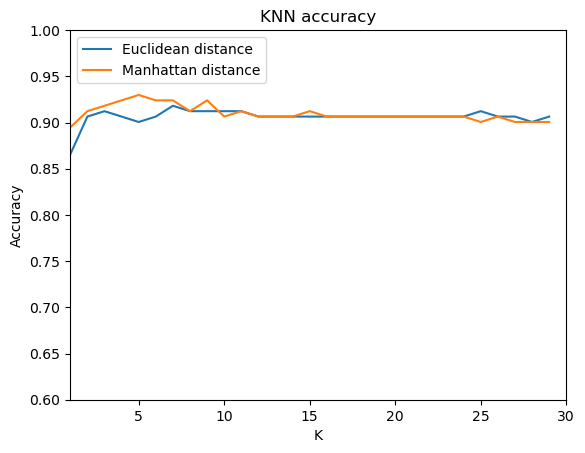

In [8]:
def plot_learningCurve(K, acc):
    # Plot training & validation accuracy values
    plt.plot(K, acc['Euclidean'])
    plt.plot(K, acc['Manhattan'])
    plt.title('KNN accuracy')
    plt.xlabel('K')
    plt.ylim([0.6, 1])
    plt.ylabel('Accuracy')
    plt.xlim([1, 30])
    plt.legend(['Euclidean distance', 'Manhattan distance'], loc = 'upper left')
    plt.show()

plot_learningCurve(K, acc)

In [8]:
k = 8
size = []
acc = {"Euclidean": [], "Manhattan": []}
for i in range(1, x_train.shape[0]):
    euclidean_distance_prediction = knn(x_train[: i], y_train[: i], x_test, k, euclidean_distance)
    euclidean_distance_accuracy = knn_accuracy(euclidean_distance_prediction, y_test)
    manhattan_distance_prediction = knn(x_train[: i], y_train[: i], x_test, k, manhattan_distance)
    manhattan_distance_accuracy = knn_accuracy(manhattan_distance_prediction, y_test)
    size.append(i)
    acc["Euclidean"].append(euclidean_distance_accuracy)
    acc["Manhattan"].append(manhattan_distance_accuracy)

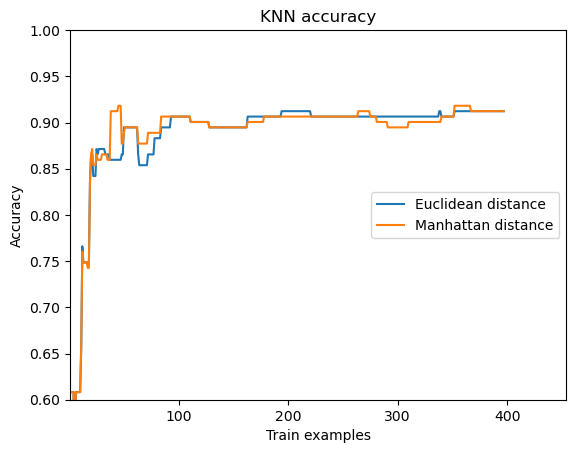

In [9]:
def plot_learningCurve(size, acc):
    # Plot training & validation accuracy values
    plt.plot(size, acc['Euclidean'])
    plt.plot(size, acc['Manhattan'])
    plt.title('KNN accuracy')
    plt.xlabel('Train examples')
    plt.ylim([0.6, 1])
    plt.ylabel('Accuracy')
    plt.xlim([1, 454])
    plt.legend(['Euclidean distance', 'Manhattan distance'], loc = 'right')
    plt.show()

plot_learningCurve(size, acc)

Usually, for a Supervised Learning algorithm, especially for the classification task, we will not only have a train and test set when constructing the model. We usually split the data set to **train, validation, and test** sets. We will use the train set to train the model. Then, the validation set is used to tune the model parameters to ensure good generalization and avoid overfitting. The test set is used to evaluate the model. 

### Using Sklearn for KNN

In [16]:
data = pd.read_csv('../../data/Cancer_data.csv')

# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
dropingFeatures = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(dropingFeatures, axis = 1 )

# Encode the label
le = LabelEncoder()
y = le.fit_transform(y)
print(y, y.size)
### The columns that I dropped here are the decisions from the EDA I did separately. 
### To save our time, we will not cover this EDA here.
### You can review this EDA process in the file StorytellingWithDataVisualization.ipynb
### Remember that EDA is a necessary procedure for any data analytic task.

drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
              'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1, axis = 1 )        # do not modify x, we will use it later 

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size = 0.3, random_state = 2024)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [11]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Euclidean Distance by default
# For Manhattan distance add optional inpupt: metric = 'manhattan'
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [19]:
accuracy_score(y_test, y_pred)

0.9005847953216374

In [14]:
neigh = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
accuracy_score(y_test, y_pred)

0.9005847953216374

### Neural Network(NN)

A NN is a computational model inspired by the way biological neural networks in the human brain work. It is composed of interconnected nodes, called neurons, organized in layers. Each neuron receives input, processes it using an activation function, and produces an output.

Recall a human Neuron and please see below:

<div style="text-align: center;">
    <img src="neuron.png" alt="Alt Text" width="50%">
</div>

This only shows one neuron. With a more complicated structure, our brain looks like this:

<div style="text-align: center;">
    <img src="brainNN.jpg" alt="Alt Text" width="50%">
</div>

Neural networks are inspired by the structure/function of the human brain and are used in machine learning to learn complex patterns and relationships in data. They can be used for tasks such as classification, regression, clustering, and more. Here are some key components of a neural network:

Input Layer: The first layer of the neural network, where input data is fed into the network.

Hidden Layers: Intermediate layers between the input and output layers. Each hidden layer consists of neurons that perform computations on the input data.

Output Layer: The final layer of the neural network, which produces the network's output.

Weights and Biases: Parameters of the neural network that are adjusted during training to minimize the error in the network's predictions.

Activation Functions: Functions applied to the output of each neuron to introduce non-linearity into the network. Common activation functions include ReLU, sigmoid, and tanh.

Loss Function: A function that measures how well the network's predictions match the actual target values. The goal of training is to minimize this loss function.

Optimization Algorithm: An algorithm used to update the weights and biases of the neural network during training. Common optimization algorithms include stochastic gradient descent (SGD), Adam, and RMSprop.

Neural networks have shown remarkable success in various applications, including image and speech recognition, natural language processing, and game playing. They are a fundamental building block of deep learning, a subfield of machine learning that focuses on learning representations of data through multiple layers of neural networks (deep neural networks).

<div style="text-align: center;">
    <img src="neuralnetwork.png" alt="Alt Text">
</div>

In [15]:
data = pd.read_csv('../../data/Cancer_data.csv')

# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
dropingFeatures = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(dropingFeatures, axis = 1 )

# Encode the label
le = LabelEncoder()
y = le.fit_transform(y)
print(y, y.size)
### The columns that I dropped here are the decisions from the EDA I did separately. 
### To save our time, we will not cover this EDA here.
### You can review this EDA process in the file StorytellingWithDataVisualization.ipynb
### Remember that EDA is a necessary procedure for any data analytic task.

drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
              'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1, axis = 1 )        # do not modify x, we will use it later 

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size = 0.3, random_state = 2023)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [16]:
# Single hidden layer NN
# Standardize the features
# This is a must for NN
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the derivative of the sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Initialize the weights and biases
np.random.seed(42)
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.01
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss
    loss = -np.mean(y_train * np.log(a2) + (1 - y_train) * np.log(1 - a2))

    # Backward pass
    dz2 = a2 - y_train.reshape(-1, 1)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X_train.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Forward pass on the test set
z1 = np.dot(X_test, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
a2 = sigmoid(z2)

# Convert probabilities to binary predictions
predictions = np.round(a2)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Epoch 0, Loss: 1.245296627501631
Epoch 100, Loss: 2.6652820480131916
Epoch 200, Loss: 3.1373037920192957
Epoch 300, Loss: 3.5538629372066284
Epoch 400, Loss: 3.9020660764968045
Epoch 500, Loss: 4.194998179120154
Epoch 600, Loss: 4.446614837765283
Epoch 700, Loss: 4.663630450726197
Epoch 800, Loss: 4.8524607427685496
Epoch 900, Loss: 5.018609507277661
Accuracy: 0.9649122807017544


In [31]:
### Use Sklearn for NN
### The first NN model is called Perceptron Algorithm.

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10), random_state = 2023)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
accuracy_score(y_test, y_pred)

0.9532163742690059

### To ensure a good generlization, Cross validation may need to be applied. 